In [2]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

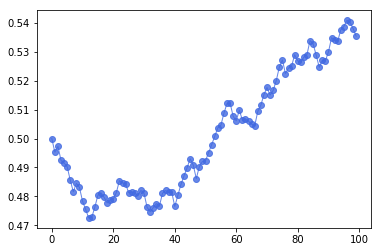

In [9]:
import random
llen = 100
perdata = []
x = [i for i in range(llen)]
tmp = 0.5
for i in range(llen):
    if i == 0:
        tmp = tmp
    else:
        tmp = perdata[i-1] + random.random()/100 - 0.005
    perdata.append(tmp)
plt.plot(x, perdata, 'ro-', color='#4169E1', alpha=0.8, linewidth=1, label='iv折线图')
plt.show()

In [ ]:
# 新的计算方式

def implied_volatility(S, K, r, T, C):
    # S is the current stock price
    # K is the strike price
    # T is the time to maturity
    # r is the risk-free rate
    # C is the option price
    # Initialize the implied volatility
    implied_vol = 0.2
    # Set the tolerance
    tol = 0.00001
    # Set the maximum number of iterations
    max_iter = 100
    # Set the initial difference between the option price and the Black-Scholes price
    diff = 1.0
    # Set the iteration counter
    iter = 0
    # Start the loop
    while (diff > tol) and (iter < max_iter):
        # Calculate the Black-Scholes price
        d1 = (np.log(S/K) + (r + 0.5*implied_vol**2)*T) / (implied_vol*np.sqrt(T))
        d2 = d1 - implied_vol*np.sqrt(T)
        bs_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        # Calculate the difference between the option price and the Black-Scholes price
        diff = np.abs(C - bs_price)
        # Calculate the implied volatility
        implied_vol = implied_vol + 0.1*diff
        # Increment the iteration counter
        iter = iter + 1
    # Return the implied volatility
    return implied_vol

In [4]:
import scipy.optimize as opt
def implied_volatility(S, K, T, r, price):
    def f(sigma):
        d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S/K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        return (price - S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)) ** 2
    opt_result = opt.minimize(f, 0.2, method='Nelder-Mead')
    return opt_result.x[0]

In [5]:
implied_volatility(3.32, 3.4, 0.018,73, 0.33)

0.2